# Individual project

Tommaso Giacomello 

## Imports


In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

## Data Exploration

In this project I am asked to perform PCA, if possible, and Logistic Regression on a given dataset but before doing so is common practice to explore the dataset to look how is the data like

In [2]:
data = pd.read_csv("C:\\Users\\len\\OneDrive\\Desktop\\BAI\\Machine Learning\\mldata_0003173616.csv")

In [3]:
data

Unnamed: 0  label  feature_1  feature_2  feature_3  feature_4  \
0              0      0  -1.498756  -1.219671  -4.210585   0.197166   
1              1      1  -0.812024   0.126158   2.849268   0.199354   
2              2      1   0.879361   0.387690  -2.950193  -3.090050   
3              3      0   0.386624   0.017309  -0.796968  -7.474373   
4              4      1   1.792150   0.155105   0.765840  -2.582924   
...          ...    ...        ...        ...        ...        ...   
1095        1095      1  -0.924456   1.938835   0.142185  -1.955830   
1096        1096      1   1.051268   0.525070  -4.009444 -11.598328   
1097        1097      1   2.914269  -1.130796   1.885922   6.928401   
1098        1098      0   1.351341  -1.895883  -0.670270  15.606239   
1099        1099      1  -0.539462  -1.062837   1.467598  -3.976845   

      feature_5  feature_6  feature_7  feature_8  ...  feature_16  feature_17  \
0      2.540327  -0.338562  -1.047403  -0.781596  ...   -0.217528   -1.161372   
1     -0.794965  -2.267592   2.466936   2.286150  ...    1.569890   -0.125005   
2      1.975631  -0.104014   0.759912  -0.629102  ...    0.587841   -0.360372   
3      2.124692   0.284089  -3.319120   0.263176  ...   -1.054498    0.157141   
4     -1.030787  -1.279749  -1.442259   1.593537  ...    1.331971   -0.976267   
...         ...        ...        ...        ...  ...         ...         ...   
1095  -1.004214  -0.772738  -1.450092  -0.570754  ...    0.219559    0.239736   
1096   4.279745   0.431398   0.083131  -0.505172  ...    1.443930   -1.134673   
1097  -2.365813   0.672416   1.155180   0.456633  ...    0.121554    1.124829   
1098  -4.073495   1.480139   0.752958  -0.776750  ...    0.611031    1.085352   
1099  -1.512552   2.229530   0.540307  -2.366834  ...    1.194831   -0.771402   

      feature_18  feature_19  feature_20  feature_21  feature_22  feature_23  \
0       0.431285   -1.335760    1.482653   -1.458346    1.482653   -1.302512   
1      -0.078548    0.088870   -2.725712    0.969148   -2.725712   -1.071581   
2      -0.743896    0.145350   -0.366937   -3.076063   -0.366937   -3.029948   
3       0.339279    0.762167    6.683479    0.720008    6.683479   -2.691470   
4       1.465744   -2.394473    3.980637    0.959717    3.980637   -2.980107   
...          ...         ...         ...         ...         ...         ...   
1095   -1.047023    0.469076    5.410103    2.280191    5.410103   -2.911106   
1096   -0.748371    0.326764    7.543445    1.531875    7.543445   -1.767176   
1097    0.265967    0.449933   -3.509231    0.876737   -3.509231    1.357733   
1098   -0.457300    0.835951   -6.603195   -3.139912   -6.603195    2.631691   
1099    0.071820    1.051189    4.270765    4.666739    4.270765    0.580025   

      feature_24  feature_25  
0       1.748926    1.711754  
1       0.290366   -0.908628  
2       0.772090   -1.453365  
3       0.622997   -0.415014  
4      -1.038080   -0.664280  
...          ...         ...  
1095   -0.975779    1.155311  
1096    6.104849   -0.456211  
1097   -0.515919    1.312091  
1098   -0.130674    3.280230  
1099   -0.826071   -1.129590  

[1100 rows x 27 columns]

In [4]:
# We perform a simplification of the features of the dataset to make the writing easier
data.drop("Unnamed: 0", inplace = True, axis = 'columns') 
counter = 0
for i in data.columns:
    if i != 'label':
        counter += 1
        data.rename({i: f'{counter}'},inplace = True, axis = 'columns')

In [5]:
data_features = data.iloc[:,1:]
data_labels = data['label']

In [7]:
# We can see that our 3 labels are fairly balanced across the dataset, so they are presented in more or less the same quantity
data_labels.value_counts()

1    372
0    368
2    360
Name: label, dtype: int64

In [8]:
data_features.describe()

1            2            3            4            5  \
count  1100.000000  1100.000000  1100.000000  1100.000000  1100.000000   
mean      0.099076     0.106972     0.152333    -0.176950    -0.298963   
std       0.963014     0.996641     2.349074     4.995396     1.882236   
min      -2.854621    -3.022673    -7.520323   -17.313685    -7.604206   
25%      -0.564671    -0.542068    -1.443221    -3.650760    -1.518940   
50%       0.136081     0.090856     0.176338    -0.170612    -0.325061   
75%       0.744129     0.751646     1.798005     3.041250     0.949240   
max       3.474333     3.991524     8.248737    18.509705     7.080677   

                 6            7            8            9           10  ...  \
count  1100.000000  1100.000000  1100.000000  1100.000000  1100.000000  ...   
mean      0.233060     0.373259     0.123814     0.111117     0.073185  ...   
std       1.936955     2.031997     2.090129     1.005029     0.960541  ...   
min      -6.903603    -6.790609    -6.314933    -3.006681    -2.434224  ...   
25%      -0.992835    -0.985164    -1.258431    -0.571139    -0.639086  ...   
50%       0.321708     0.385681     0.166365     0.088805     0.076667  ...   
75%       1.650189     1.790936     1.507223     0.769672     0.690397  ...   
max       5.703293     6.109891     6.794078     3.577180     3.354900  ...   

                16           17           18           19           20  \
count  1100.000000  1100.000000  1100.000000  1100.000000  1100.000000   
mean      0.093211     0.096783     0.076914     0.092489     0.500849   
std       1.012397     1.001387     1.008039     1.009545     4.429114   
min      -2.846939    -2.993722    -3.113379    -3.016513   -15.697540   
25%      -0.584699    -0.576009    -0.579385    -0.567956    -2.413339   
50%       0.088242     0.077526     0.052166     0.107462     0.144898   
75%       0.763930     0.761606     0.739147     0.789152     3.119154   
max       3.036454     3.572705     3.113575     3.345025    17.517271   

                21           22           23           24           25  
count  1100.000000  1100.000000  1100.000000  1100.000000  1100.000000  
mean      0.447747     0.500849    -0.247923    -0.200508     0.027351  
std       2.050082     4.429114     1.957355     2.236698     1.956582  
min      -6.085438   -15.697540    -6.624667    -7.419186    -6.664815  
25%      -0.913917    -2.413339    -1.609603    -1.701172    -1.332717  
50%       0.488143     0.144898    -0.284810    -0.309398     0.055298  
75%       1.795202     3.119154     0.995832     1.279086     1.359725  
max       7.977193    17.517271     6.479688     6.900411     7.174121  

[8 rows x 25 columns]

By this description of the data we can see that it has no missing values (we are going to check in the following cells) and that features take values between the same range more or less apart from feature 4 and 22 that have a bigger range

In [9]:
# Checking for missing values
data.isnull().sum() #no missing values

label    0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
dtype: int64

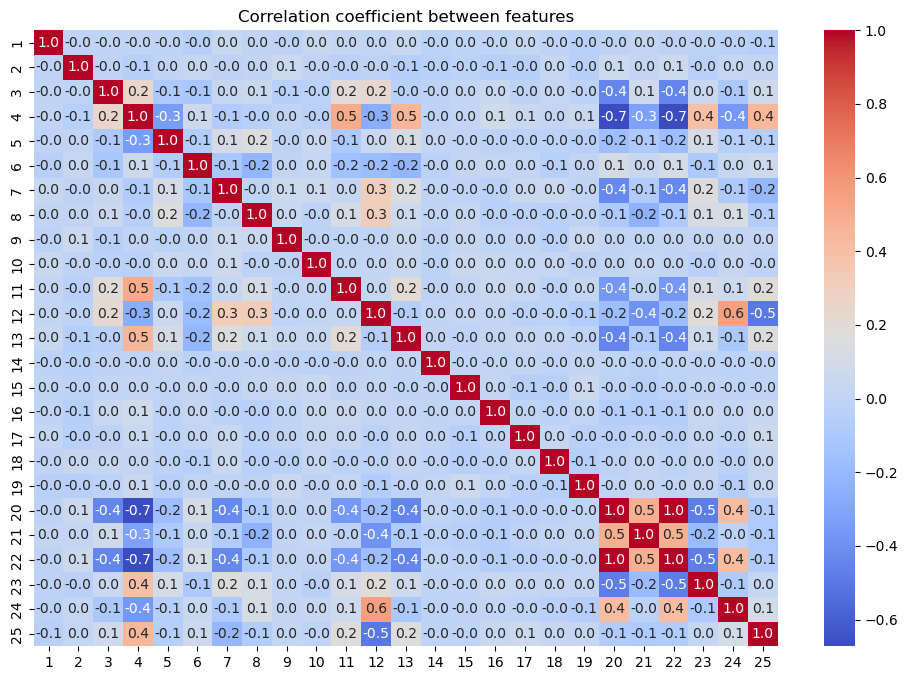

In [10]:
# Looking for correlation , if we have two linearly dependent features we can remove one of them
plt.figure(figsize = (12,8))
plt.title('Correlation coefficient between features')
sns.heatmap(data_features.corr(), annot = True, cmap = 'coolwarm', fmt ='.01f');

We can see that generally we have really low correlation among all the features, so surely have a non-linear relationship between them, on the other hand we can clearly see that feature 20 and 22 have correlation coefficient equal to 1 so are linearly dependent and we can remove on of them

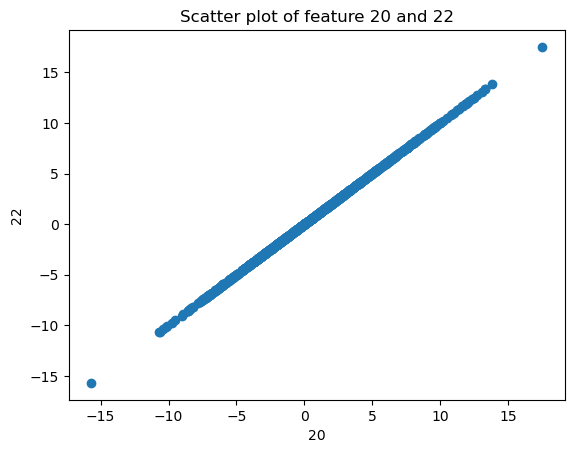

In [11]:
# Let us visualize the correation between feature 20 and 22
plt.title('Scatter plot of feature 20 and 22')
plt.xlabel('20')
plt.ylabel('22')
plt.scatter(data['20'], data['22']);

In [12]:
data_features.drop('20', axis = 'columns', inplace = True)
data.drop('20', axis = 'columns', inplace = True)

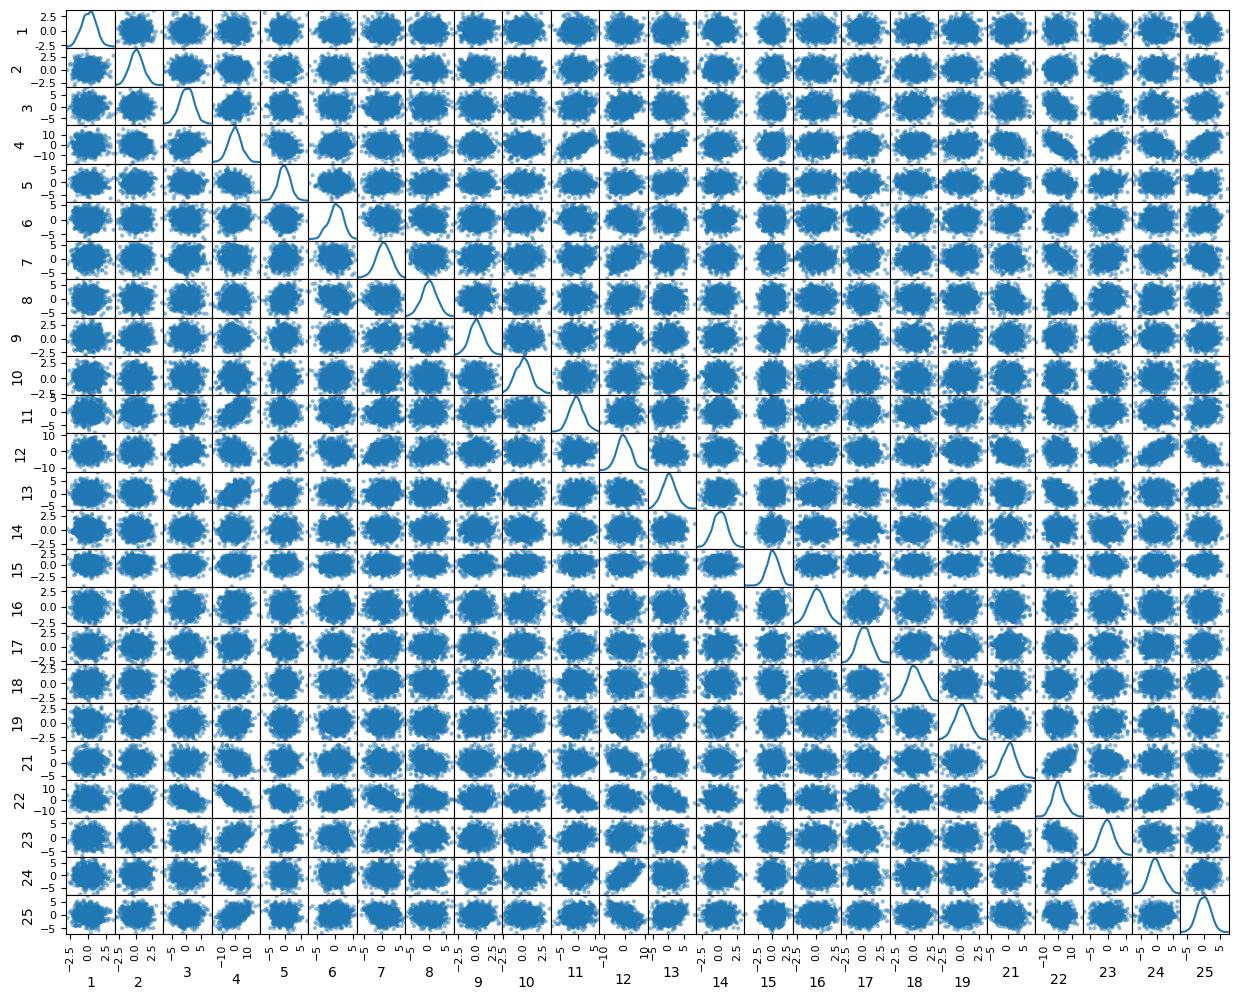

In [13]:
# We can also see how other variables relates with each other with a big scatter plot
from pandas.plotting import scatter_matrix
sm = scatter_matrix(data_features, diagonal = 'kde', figsize = (15,12))

This latter plot confirms that the majority of the features are not linearly correlated but also tells us that the distributions of each features seems pretty symmetric and pretty similar to normal distribution we will check it that is indeed the case

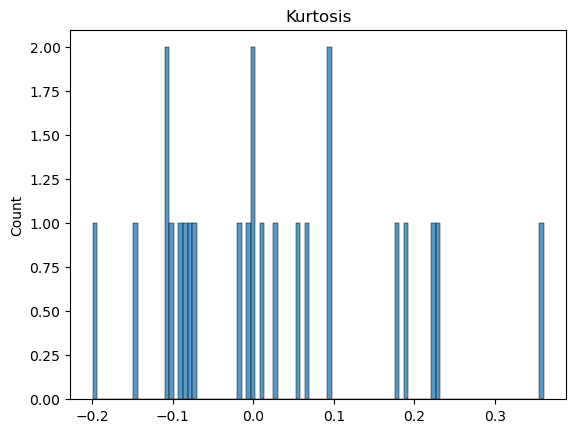

In [14]:
from scipy.stats import kurtosis
df_kurt_cells = []
for i in range(len(data_features.columns)) :     
    v_df = data[data_features.columns[i]]
    df_kurt_cells += [kurtosis(v_df)]   
df_kurt_cells
plt.title('Kurtosis')
sns.histplot(df_kurt_cells,bins=100);

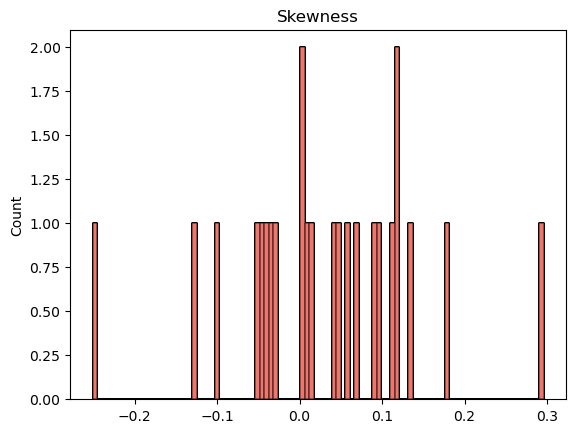

In [15]:
from scipy.stats import skew
df_skew_cells = []
for i in range(len(data_features.columns)) :     
    v_df = data[data_features.columns]
    df_skew_cells += [skew(v_df)]   
plt.title('Skewness')
sns.histplot(df_skew_cells,bins=100, legend = False);

We have few features so Kurtosis and Skewness are not so representatives but we can we can still notice some patterns, in the kurtosis graph we notice that most of the features take nonpositive values so this means that they have a platykurtic distribution (Thin tails) and then minority has leptokurtic distribution (fat tails) and by the skewness we can see that distributions are pretty symmetric

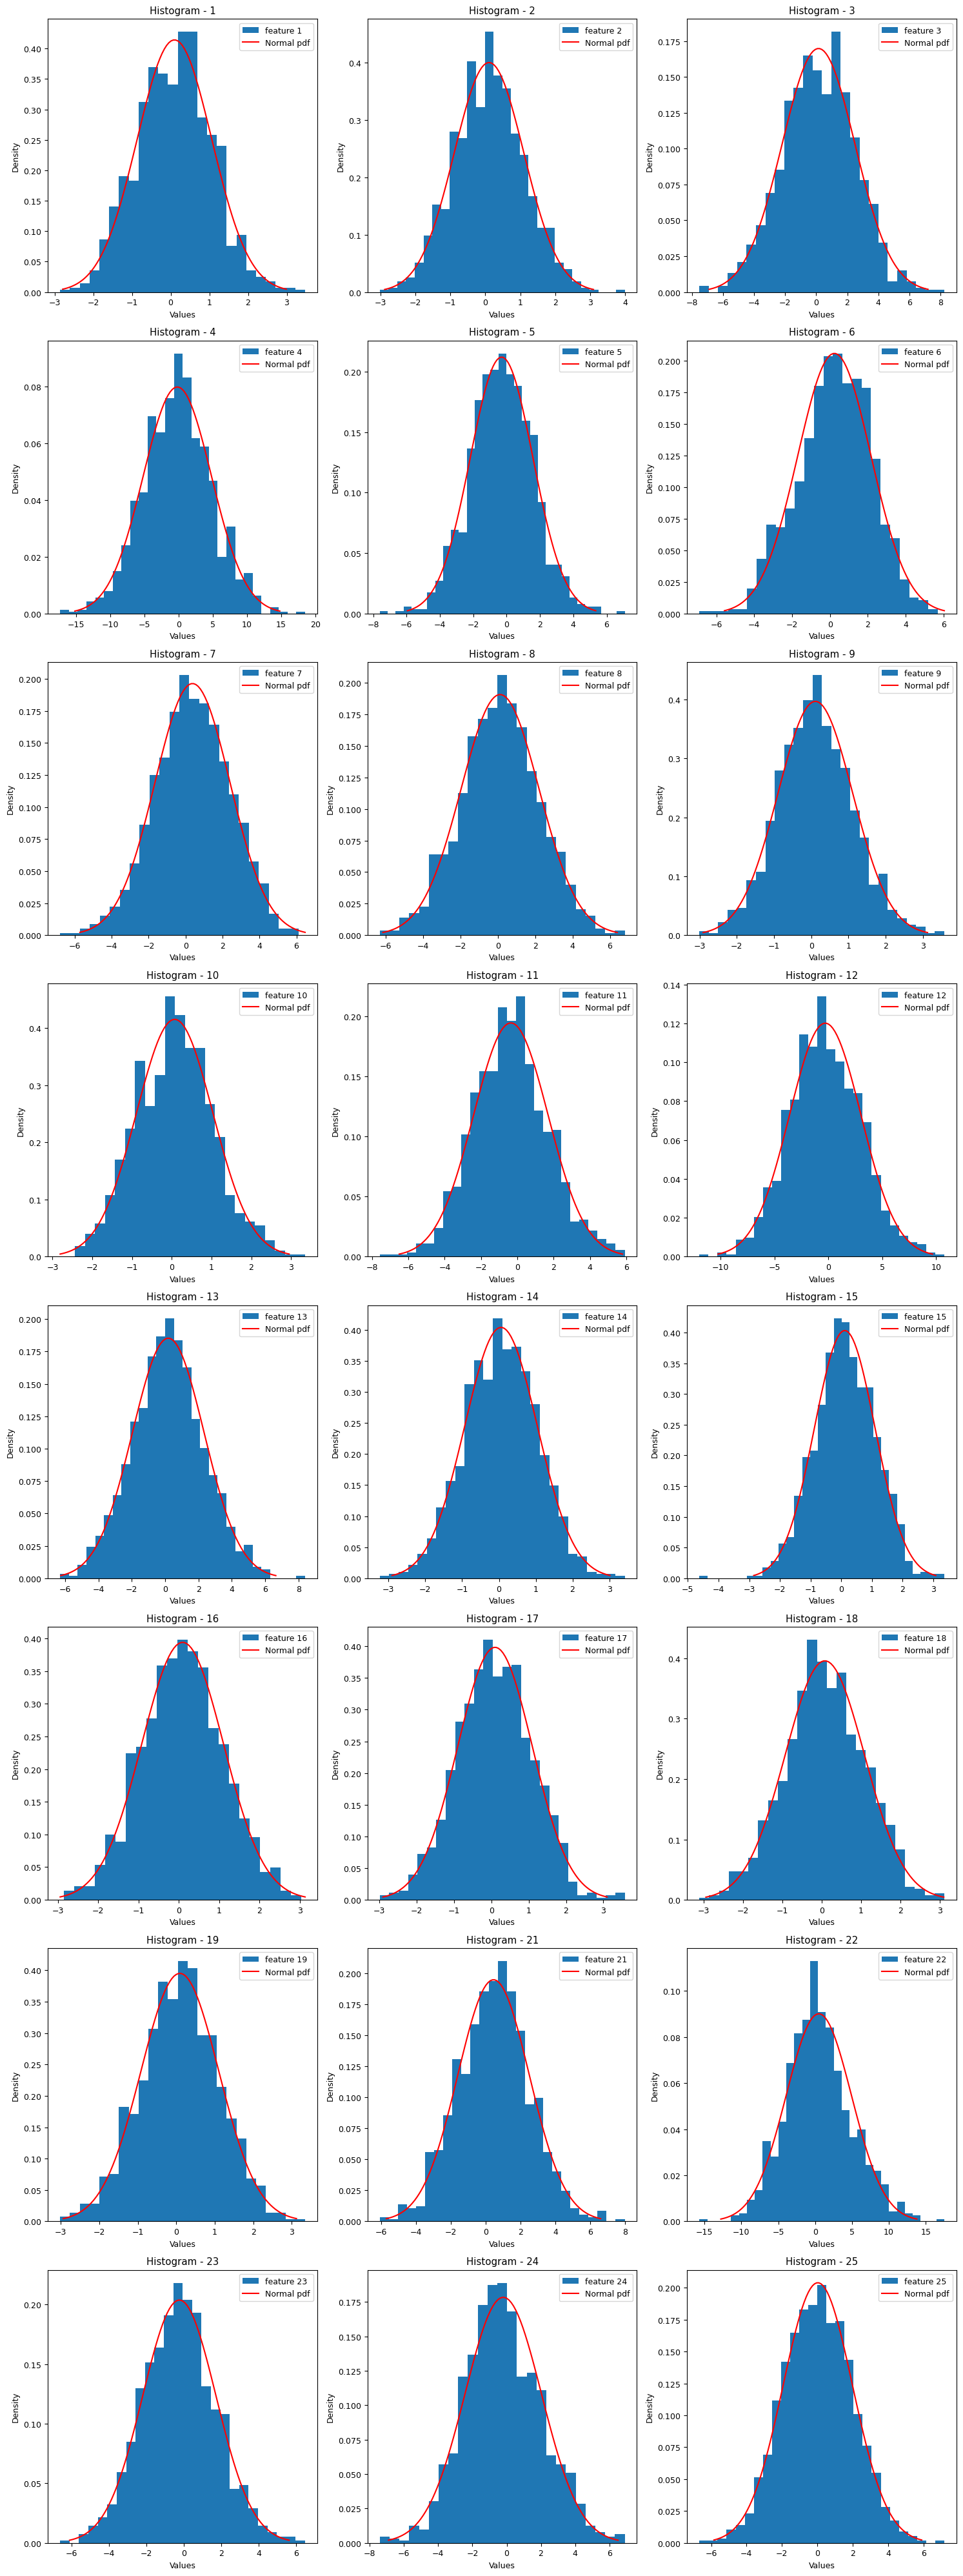

In [238]:

num_cols = len(data_features.columns)
num_rows = int(np.ceil(num_cols / 3)) 

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
axes = axes.flatten()  
for i, column in enumerate(data_features.columns):
    ax = axes[i]
    ax.hist(data[column], bins='auto', density=True, label=f'feature {column}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Density')
    ax.set_title(f'Histogram - {column}')
    
    # Normal distribution curve
    mu, std = data[column].mean(), data[column].std()
    x = np.linspace(mu -  3*std, mu +  3*std, 100) # Here we multiply by 3 to include a wider range and make the graph nicer
    y = scipy.stats.norm.pdf(x, mu, std)
    ax.plot(x, y, 'r', label='Normal pdf')
    ax.legend()

# Adjust the layout spacing and display the plot
plt.tight_layout()
plt.show()


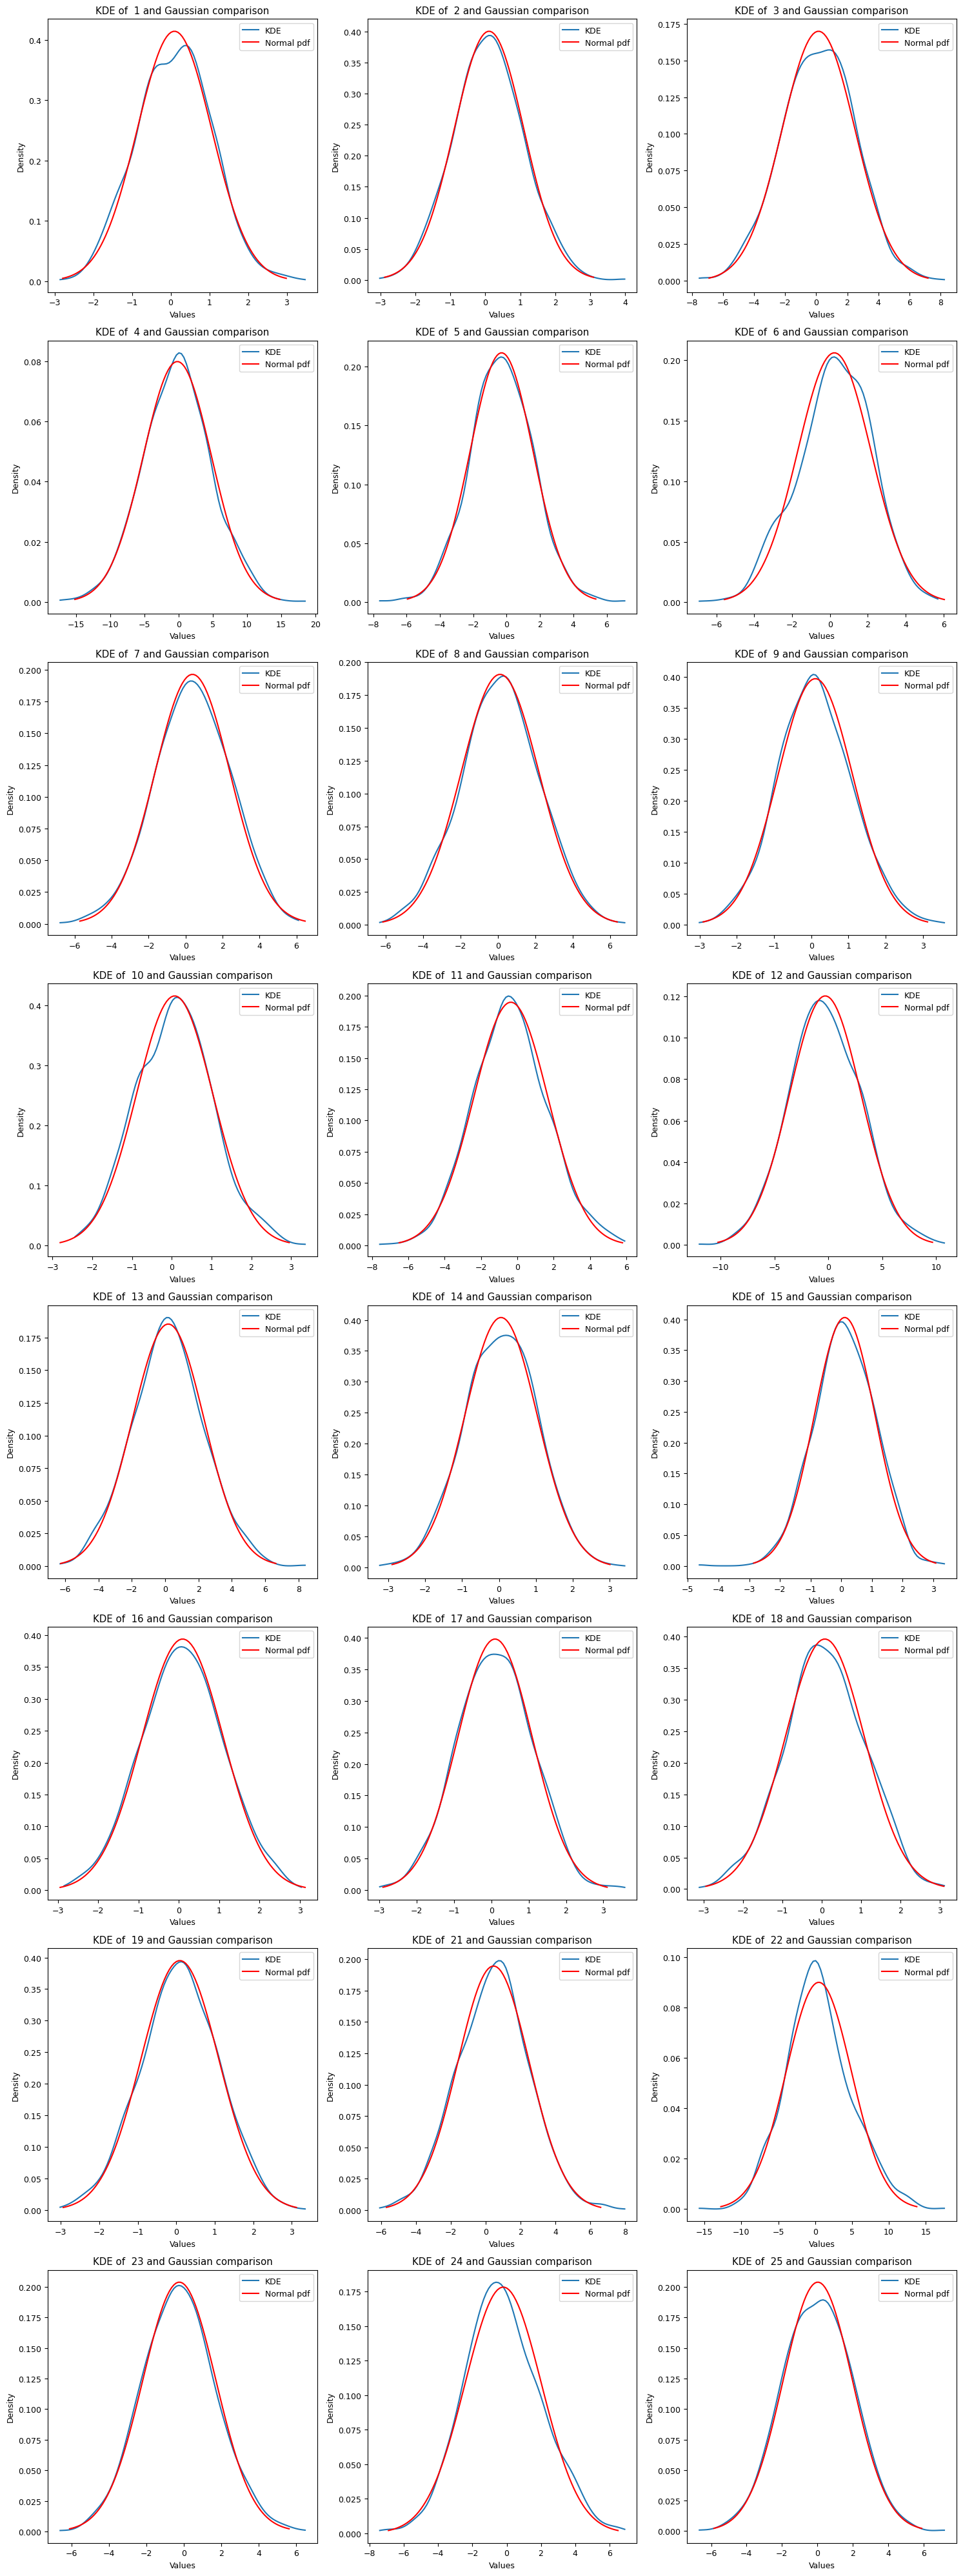

In [242]:
num_cols = len(data_features.columns)
num_rows = int(np.ceil(num_cols / 3))

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
axes = axes.flatten()
for i, column in enumerate(data_features.columns):
    ax = axes[i]
    ax.set_xlabel('Values')
    ax.set_ylabel('Density')
    ax.set_title(f'KDE of  {column} and Gaussian comparison')
    
    #KDE 
    kde = stats.gaussian_kde(data[column]) #kde  found using gaussian kernels
    x = np.linspace(data[column].min(), data[column].max(), 100) # the x component
    y = kde(x)
    ax.plot(x, y, label='KDE')

    # Gaussian distribution 
    mu, std = data[column].mean(), data[column].std()
    x = np.linspace(mu -  3*std, mu +  3*std, 100) # Here we multiply by 3 to include a wider range and make the graph nicer
    y = scipy.stats.norm.pdf(x, mu, std)
    ax.plot(x, y, 'r', label='Normal pdf')
    ax.legend()

plt.tight_layout()
plt.show()



After looking at the distribution of the data since our primary objective is to build a classificator let us see if the data are well separated and some natural clusters exists to know if a classifier can perform well

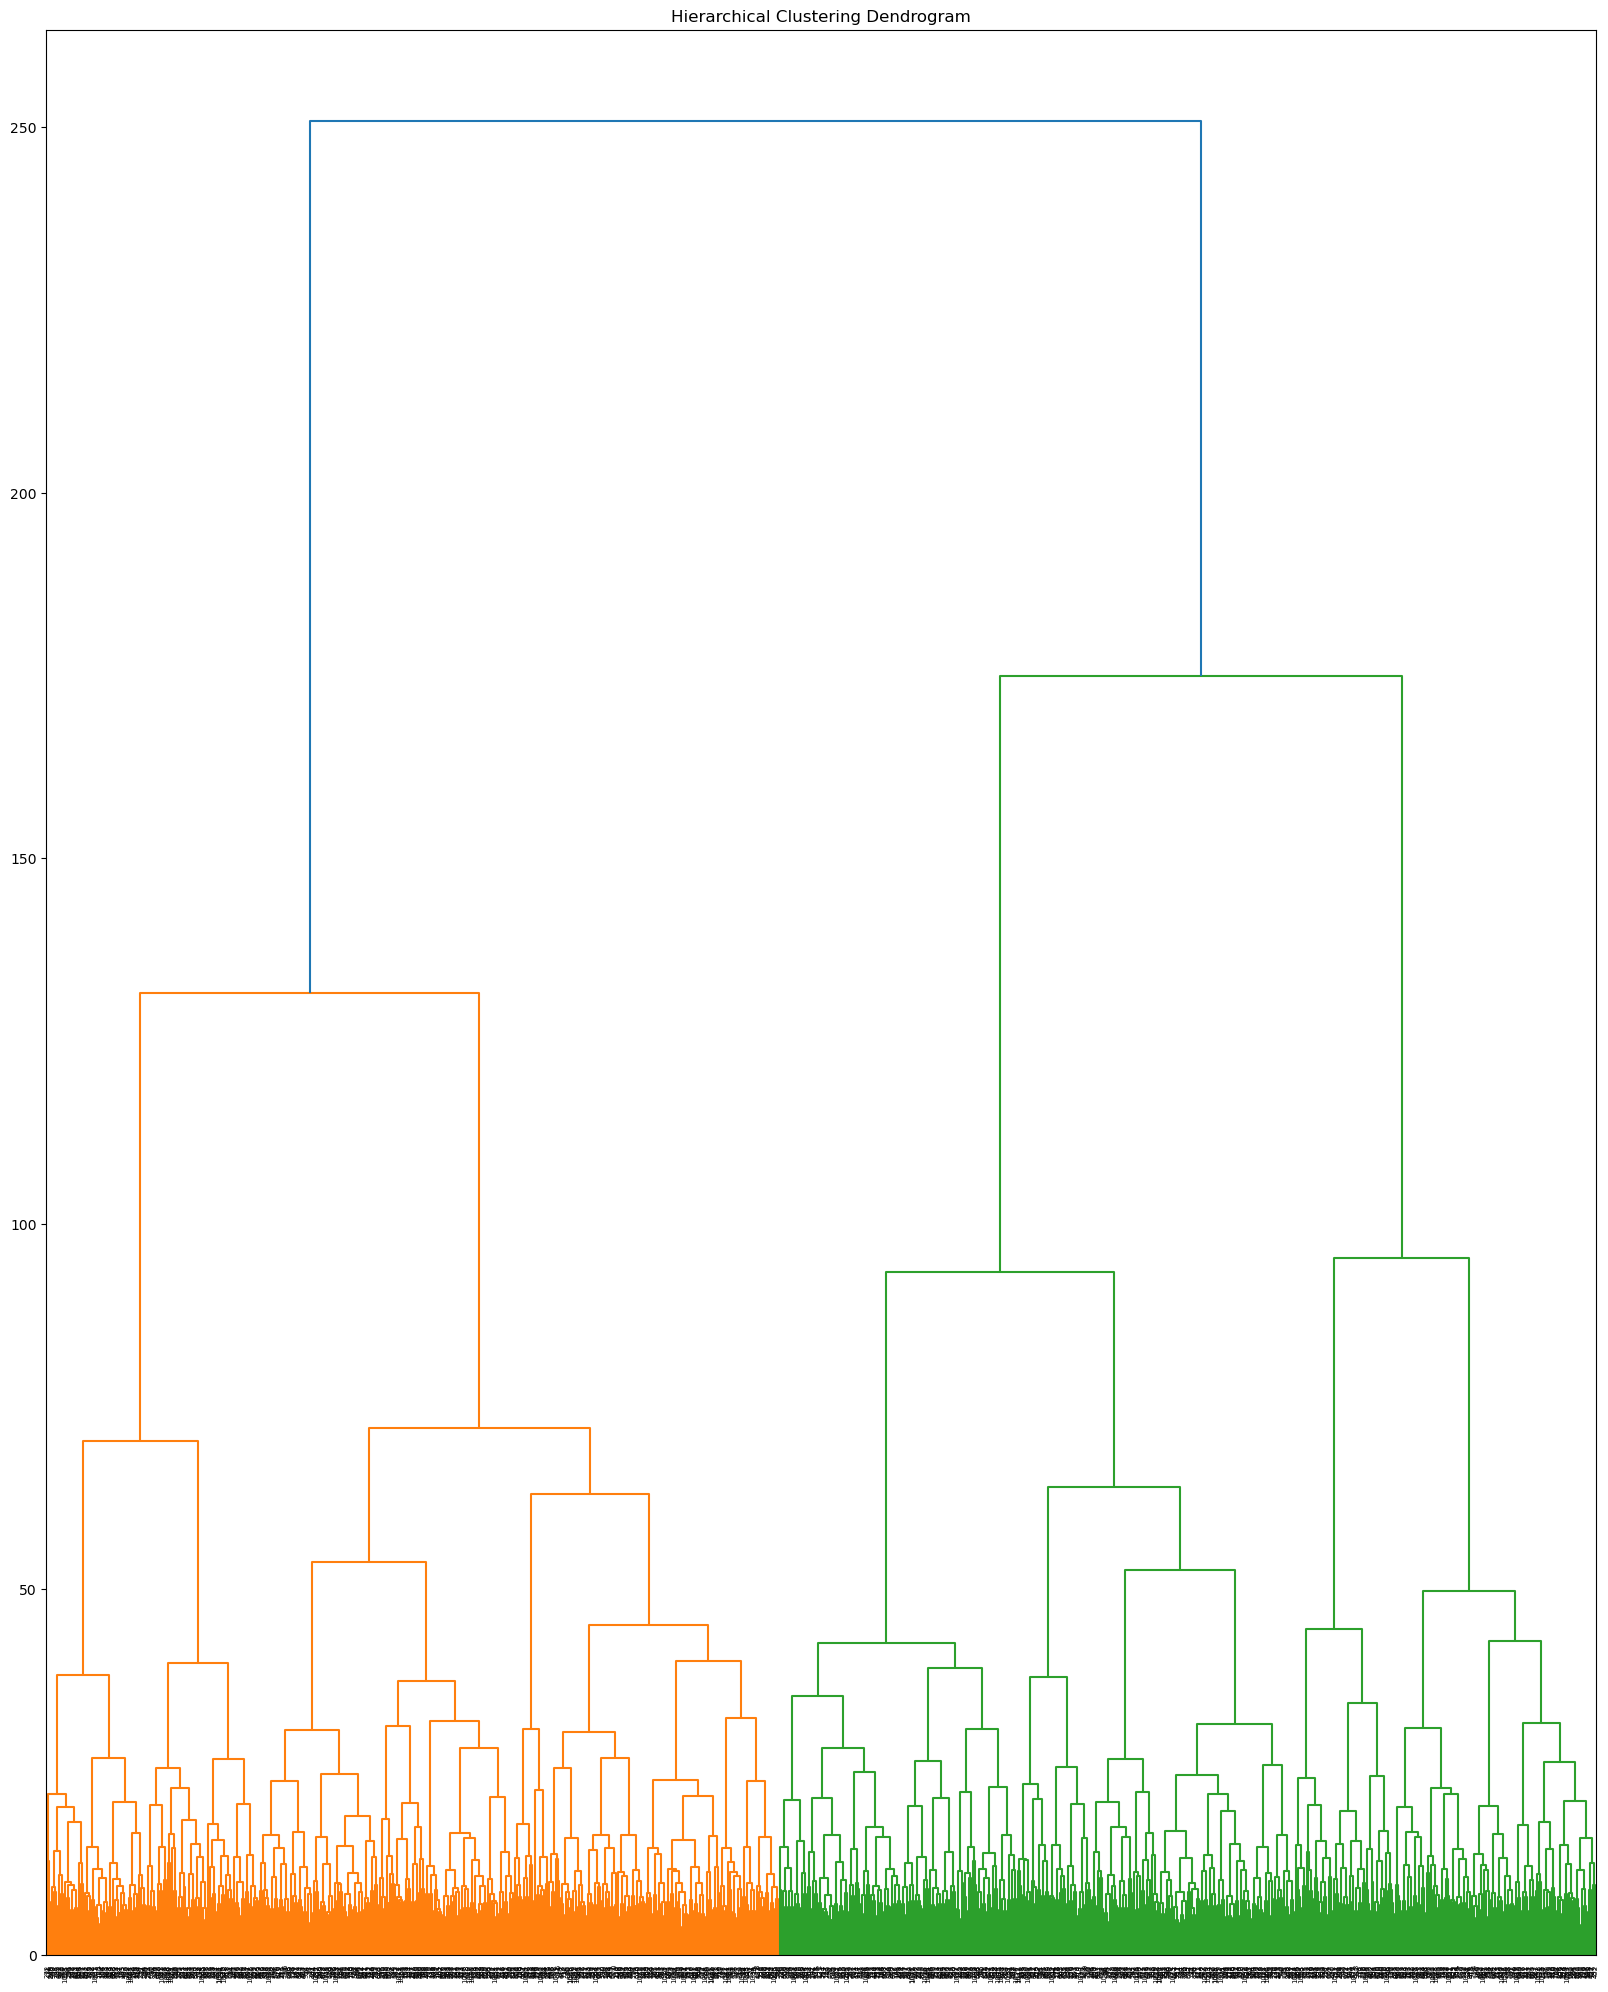

In [32]:
# Here we see the dendogram and observe that the data have not natural cluster corresponding to the one of the labels
# since it detetects two cluster
Z = linkage(data_features, method='ward')
plt.figure(figsize=(20, 25))
plt.title("Hierarchical Clustering Dendrogram")
dendrogram(Z);

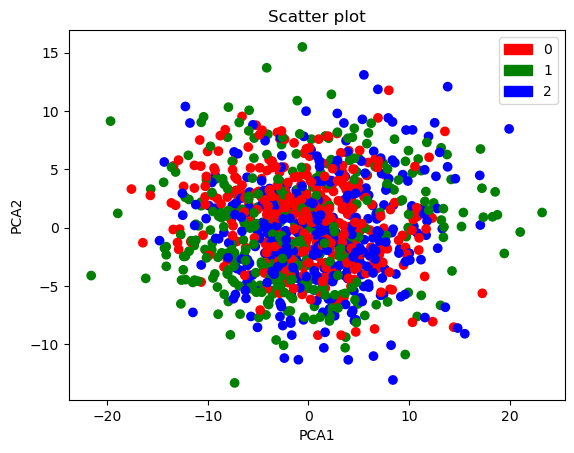

In [27]:
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches

#Show the messiness of the data
pca2 = PCA(n_components=2)
data2 = pca2.fit_transform(data_features)
colors = ['r', 'g', 'b']
labels = ['0', '1', '2']
plt.scatter(data2[:, 0], data2[:, 1], c=[colors[label] for label in data_labels])
legend_handles = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, labels)]
plt.legend(handles=legend_handles)
plt.title('Scatter plot')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

## Data Cleaning and Scaling

Now after exploring the data we may want to perform some transformation to make it look nicer

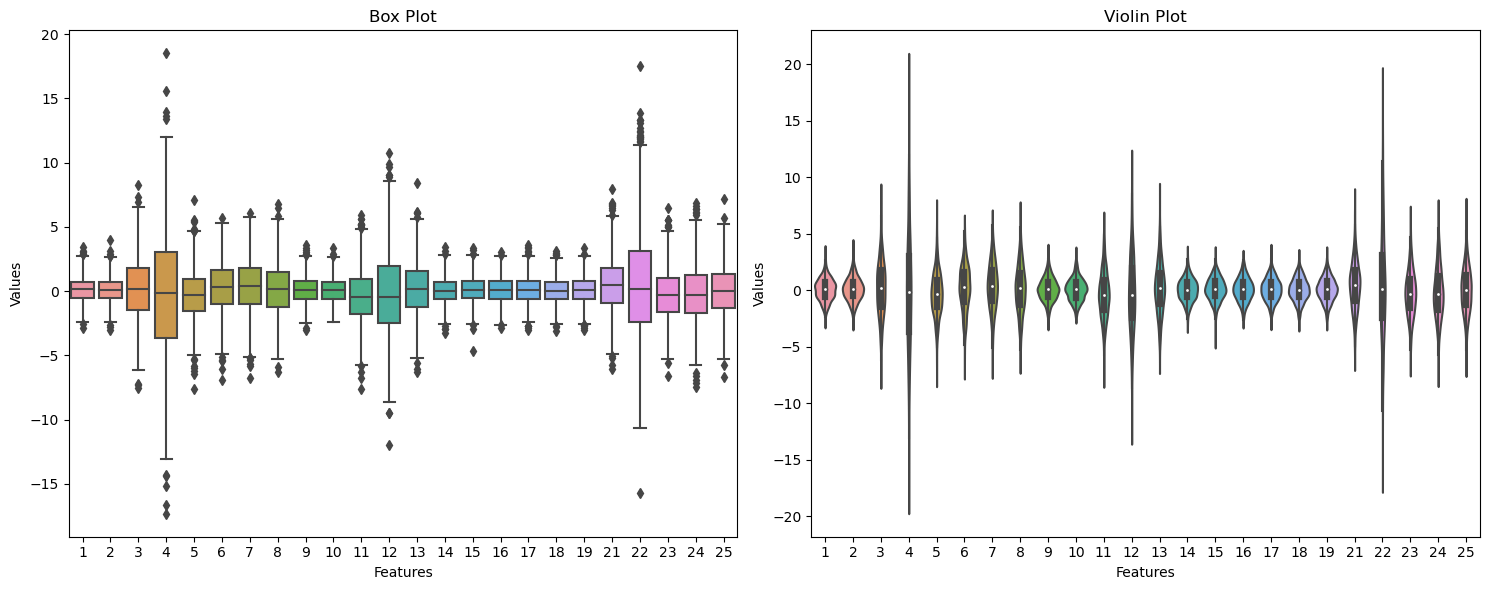

In [16]:
fig, axes =plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(data_features, ax = axes[0])
sns.violinplot(data_features, ax = axes[1])
axes[0].set_title('Box Plot')
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Values')

axes[1].set_title('Violin Plot')
axes[1].set_xlabel('Features')
axes[1].set_ylabel('Values')

plt.tight_layout()
plt.show()

We have said that the main problem of our dataset is the big range of values for feature 4, 22, 12 that can influence our classifier, as is possible to see in this boxplot, so to solve this problem I think the best way is constraint the values to a specific range using MinMaxScaler

### MinMax Scaler

In [17]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-2,2))
data_min_max_features = min_max_scaler.fit_transform(data_features) 
data_min_max_features = pd.DataFrame(data_min_max_features, columns = data_features.columns, index = data_features.index)
data_min_max_labels = data_labels

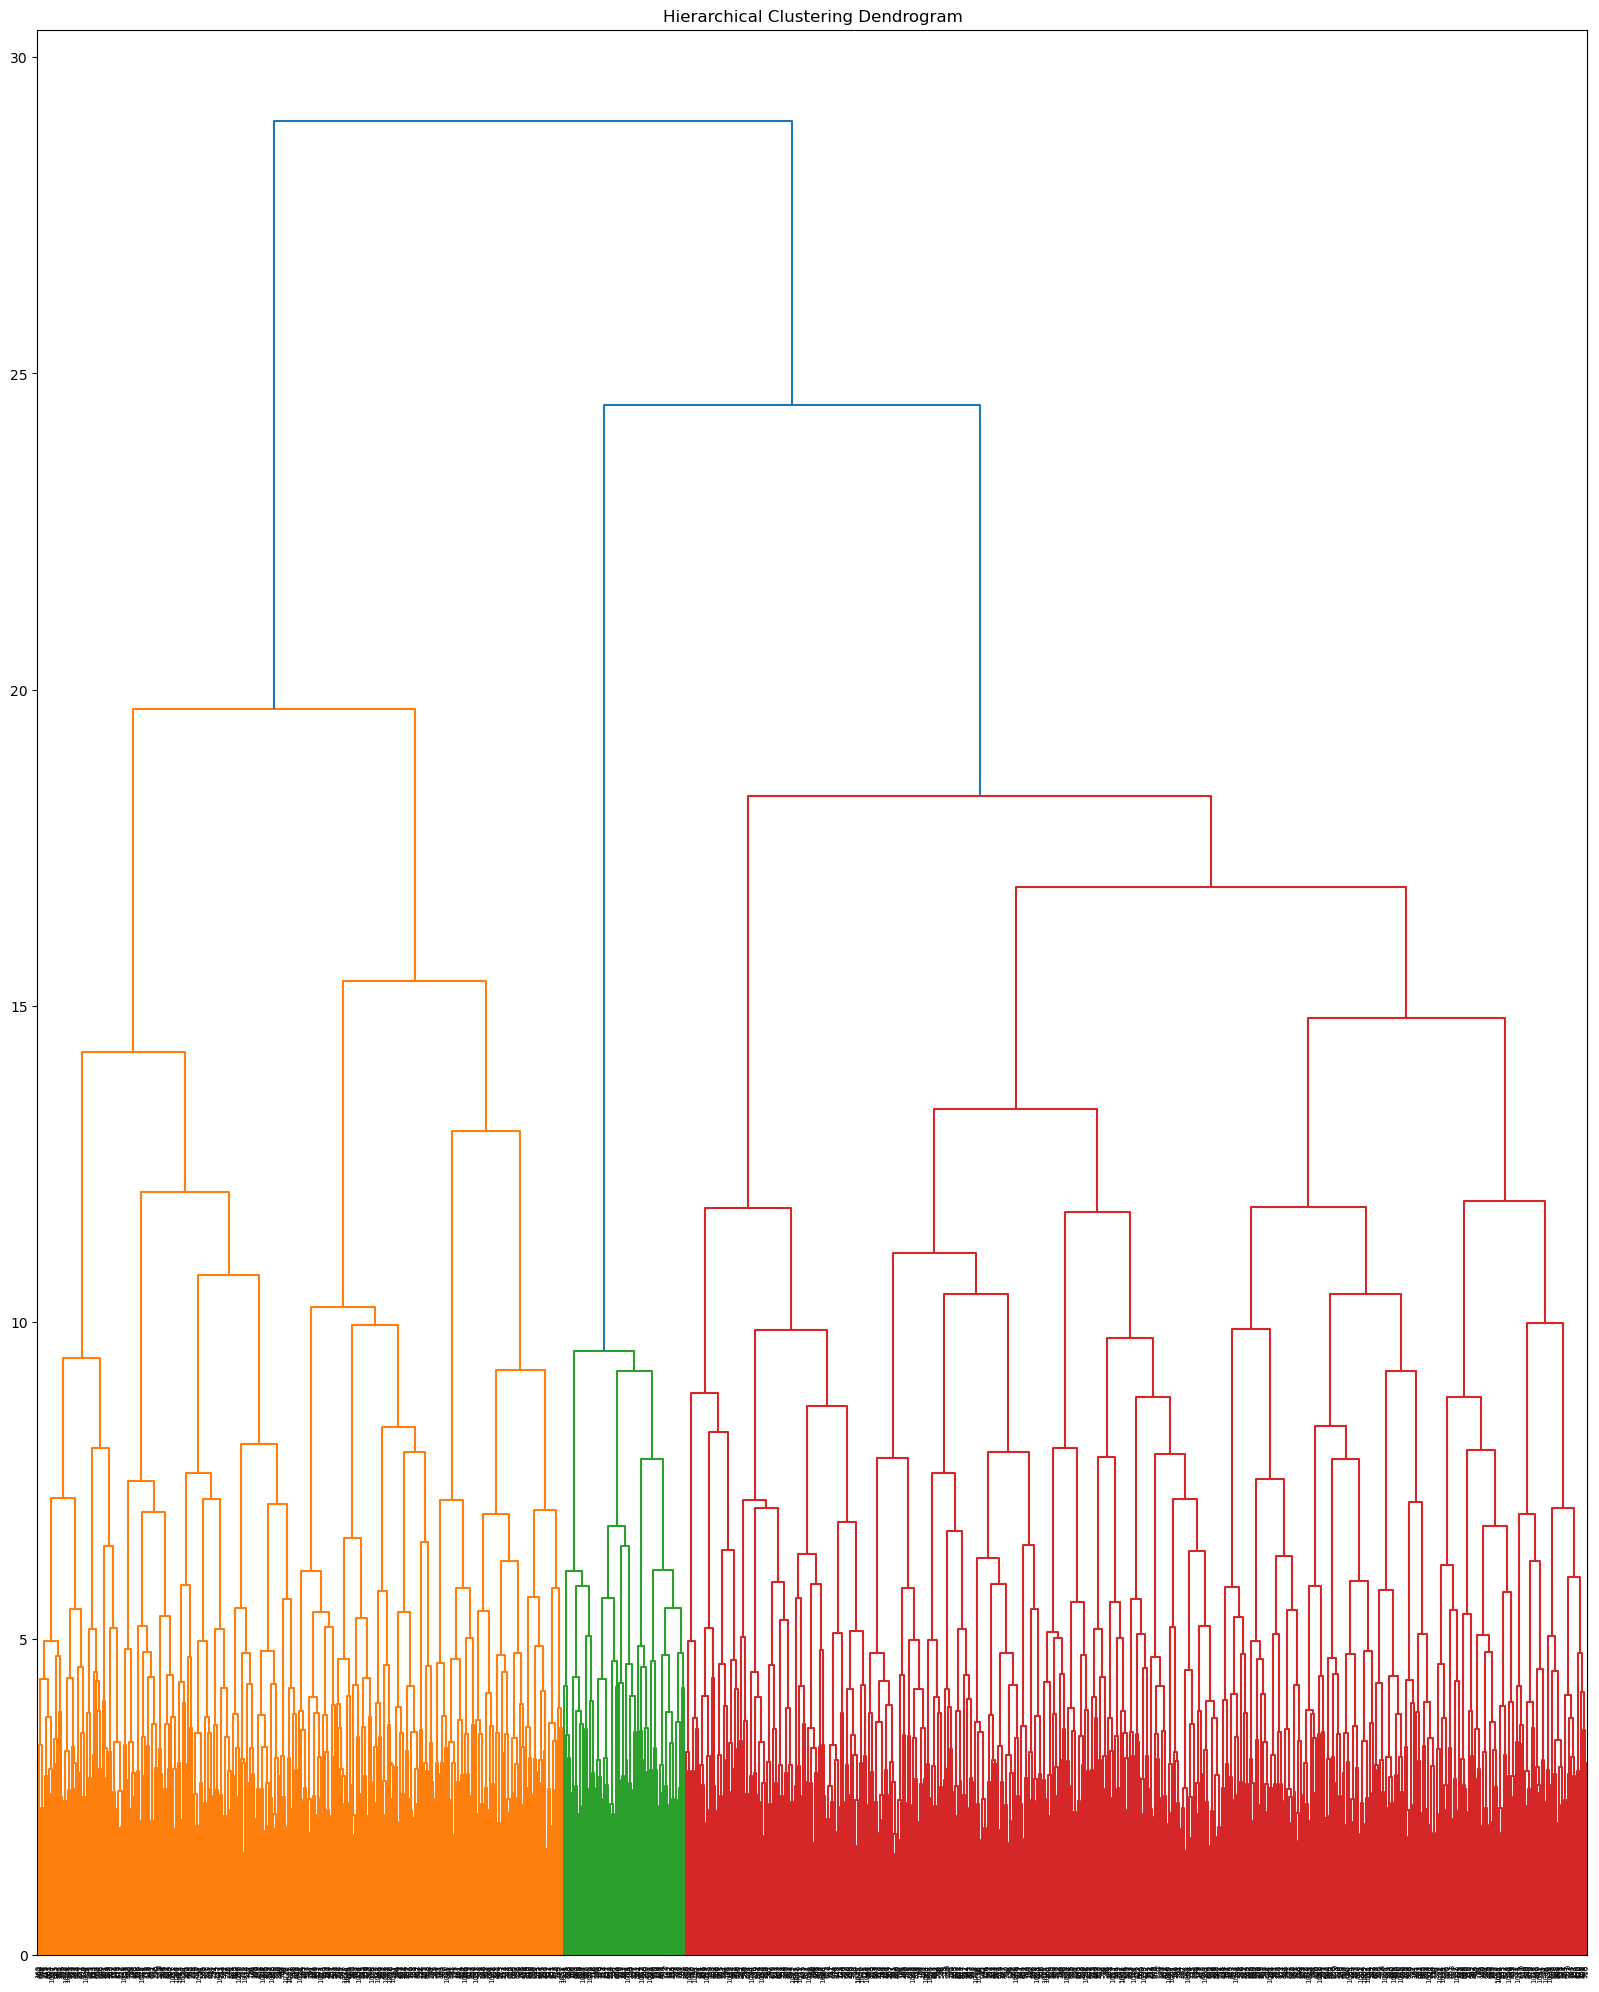

In [18]:
Z1 = linkage(data_min_max_features, method='ward')
plt.figure(figsize=(20, 25))
plt.title("Hierarchical Clustering Dendrogram")
dendrogram(Z1);

Now we are going to count common labels with the real dataset, since the number of the label in the clustering may not correspond to the label in our data we try all combinations and see if some clusters are common

In [19]:
# Count common labels with the real dataset
labels_hier = fcluster(Z1,3, criterion = 'maxclust')
labels_hier = labels_hier -1
counter = 0
First_label = []
Second_label = []
Third_label = []
for i in range(len(data_labels.to_numpy())):
    if labels_hier[i] == 0:
        First_label.append(counter)
        counter += 1
    elif labels_hier[i] == 1:
        Second_label.append(counter)
        counter += 1
    elif labels_hier[i] == 2:
        Third_label.append(counter)
        counter += 1

In [20]:
counter1 = 0
counter2 = 0
counter3 = 0
for i in data.label[data.label == 0].index:
    for j in First_label:
        if i == j:
            counter1 += 1
    for w in Second_label:
        if i == w:
            counter2 += 1
    for z in Third_label:
        if i == z:
            counter3 += 1
counter1, counter2, counter3

(132, 4, 232)

In [21]:
counter1 = 0
counter2 = 0
counter3 = 0
for i in data.label[data.label == 1].index:
    for j in First_label:
        if i == j:
            counter1 += 1
    for w in Second_label:
        if i == w:
            counter2 += 1
    for z in Third_label:
        if i == z:
            counter3 += 1
counter1, counter2, counter3

(143, 48, 181)

In [22]:
counter1 = 0
counter2 = 0
counter3 = 0
for i in data.label[data.label == 2].index:
    for j in First_label:
        if i == j:
            counter1 += 1
    for w in Second_label:
        if i == w:
            counter2 += 1
    for z in Third_label:
        if i == z:
            counter3 += 1
counter1, counter2, counter3

(98, 35, 227)

Here we see that hierarchical clustering finds 3 natural clusters however the red cluster is bigger than the others and this do not reflect our balanced data how we can see by the search of common labels

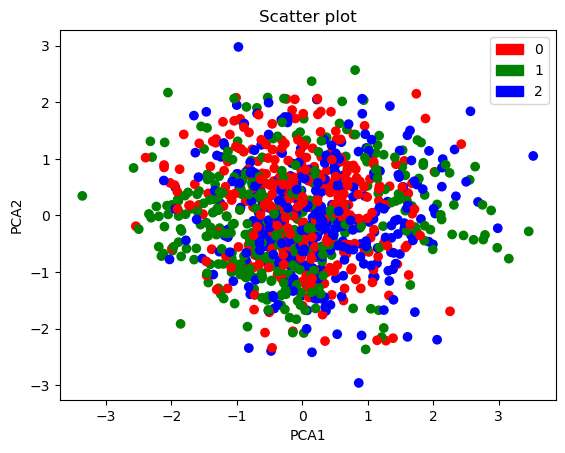

In [29]:
# We can say that MinMax doesn't change so much the messiness of the data and show that data are not well separated

pca2 = PCA(n_components=2)
data2 = pca2.fit_transform(data_min_max_features)
colors = ['r', 'g', 'b']
labels = ['0', '1', '2']
plt.scatter(data2[:, 0], data2[:, 1], c=[colors[label] for label in data_labels])
legend_handles = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, labels)]
plt.legend(handles=legend_handles)
plt.title('Scatter plot')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

## PCA

To know if PCA works in this dataset we should test the data of reduced dimension in the classifier we will build afterwards, but we can already understand that PCA will not work properly.
Firstly, most of the data are not linearly correlated but the PCA is indeed very useful when the contrary happens so if we have a multicolinear dataset we can compress it in indipendent features but with our case is not optimal.
Secondly, we have seen the data are messy is very difficult and we notice that natural clusters exists but are not the ones we wanted and if we compress it using PCA this will accentuate the difficulty of finding some patterns.
However, for the ultimate test we will try to use PCA on our classifier and see how it performs.

### PCA for Scaled Dataset

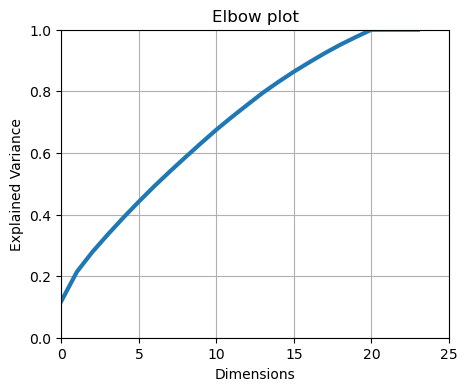

In [31]:
pca = PCA()
pca.fit(data_min_max_features)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(5, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 25, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.grid(True)
plt.title('Elbow plot')
plt.show()

In [91]:
pca15 = PCA(n_components = 15)
data_min_max_15_features = pca15.fit_transform(data_min_max_features)
data_min_max_15_features = pd.DataFrame(data_min_max_15_features, index = data_min_max_features.index, columns = [i for i in range(1,16)])
data_min_max_15_labels = data_labels

I take the number of dimension as 15  because viewing the elbow plot there lower  marginal return after dimension 15

### PCA for Original Dataset

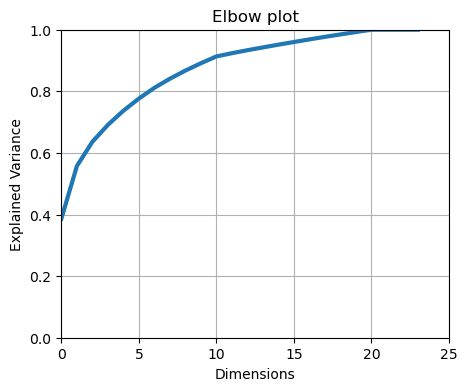

In [32]:
pca = PCA()
pca.fit(data_features)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(5, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 25, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.grid(True)
plt.title('Elbow plot')
plt.show()

In [81]:
pca10 = PCA(n_components = 10)
data_10_features = pca10.fit_transform(data_features)
data_10_features = pd.DataFrame(data_10_features, index = data_features.index, columns = [i for i in range(1,11)])
data_10_labels = data_labels

Here is more visible why I take the dimension as 10 since there are marginal returns after dimension 10 since is after the 'elbow'

# Logistic Regression

Now we will test the model with all the datasets we have found with a standard procedure, we create two parametric grids to be used to tune the LogisticRegression using GridSearchCV and then we see how they perform on train, using the confusion matrix and test sets using the scores to see if the classifier is working well.
As a scoring for the GridSearch I will use the accuracy as scoring since I have balanced data and the thing I care the most is the ability of the model to classify correctly the labels

In [300]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, cross_val_predict

#First one for OnevsOneClassifier and some solvers which works for penalties ['l2', None]
param_grid_ovo_1 = [{'estimator__penalty': ['l2', None], 'estimator__C':list(np.logspace(-4, 4, 10)) + [1] , 'estimator__solver' : ['lbfgs', 'newton-cg', 'sag', 'saga'], 
                       'estimator__max_iter': [200,800,1500,4000], 'estimator__fit_intercept' : [True, False] }]

#Second one for OnevsOneCLassifier and other solvers
param_grid_ovo_2 = [{'estimator__penalty': ['l2','l1'], 'estimator__C':np.logspace(-4, 4, 10) + [1] , 'estimator__solver' : ['liblinear'], 
                       'estimator__max_iter': [200,800,1500,4000], 'estimator__fit_intercept' : [True, False]}]


I choose this grid since I want to tune the model based on the parameters of the Logistic Regression and I choose the OneVsOneClassifier since it works well when we do not have much distinct labels, in our case only 3

## Logistic Regression for original data

In [301]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data_features, data_labels, test_size=0.2, random_state=42)

#### Tune of Ovo classifier

In [302]:
grid_1 = GridSearchCV(OneVsOneClassifier(LogisticRegression(random_state = 42)), param_grid_ovo_1, cv = 5, scoring = 'accuracy', n_jobs = -1)
grid_1.fit(Xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=OneVsOneClassifier(estimator=LogisticRegression(random_state=42)),
             n_jobs=-1,
             param_grid=[{'estimator__C': [0.0001, 0.000774263682681127,
                                           0.005994842503189409,
                                           0.046415888336127774,
                                           0.3593813663804626,
                                           2.782559402207126, 21.54434690031882,
                                           166.81005372000558,
                                           1291.5496650148827, 10000.0, 1],
                          'estimator__fit_intercept': [True, False],
                          'estimator__max_iter': [200, 800, 1500, 4000],
                          'estimator__penalty': ['l2', None],
                          'estimator__solver': ['lbfgs', 'newton-cg', 'sag',
                                                'saga']}],
             scoring='accuracy')

In [303]:
grid_2 = GridSearchCV(OneVsOneClassifier(LogisticRegression(random_state = 42)), param_grid_ovo_2, cv = 5, scoring = 'accuracy', n_jobs = -1)
grid_2.fit(Xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=OneVsOneClassifier(estimator=LogisticRegression(random_state=42)),
             n_jobs=-1,
             param_grid=[{'estimator__C': array([1.00010000e+00, 1.00077426e+00, 1.00599484e+00, 1.04641589e+00,
       1.35938137e+00, 3.78255940e+00, 2.25443469e+01, 1.67810054e+02,
       1.29254967e+03, 1.00010000e+04]),
                          'estimator__fit_intercept': [True, False],
                          'estimator__max_iter': [200, 800, 1500, 4000],
                          'estimator__penalty': ['l2', 'l1'],
                          'estimator__solver': ['liblinear']}],
             scoring='accuracy')

#### Confusion Matrix for Ovo

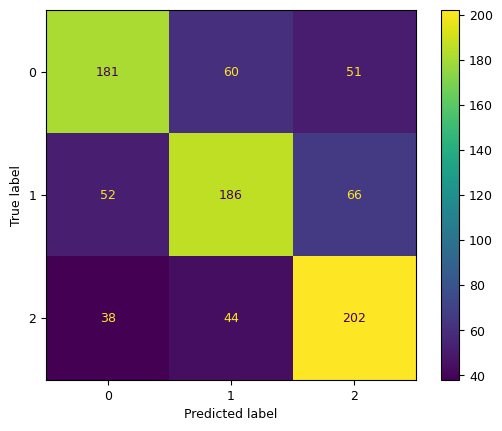

In [304]:
# First grid
y_train_pred = cross_val_predict(grid_1, Xtrain, ytrain, cv = 3)
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(ytrain, y_train_pred)
plt.show()

In [305]:
# First grid
cross_val_score(grid_1, Xtrain, ytrain, cv = 3, scoring = 'accuracy')

array([0.63265306, 0.6552901 , 0.65187713])

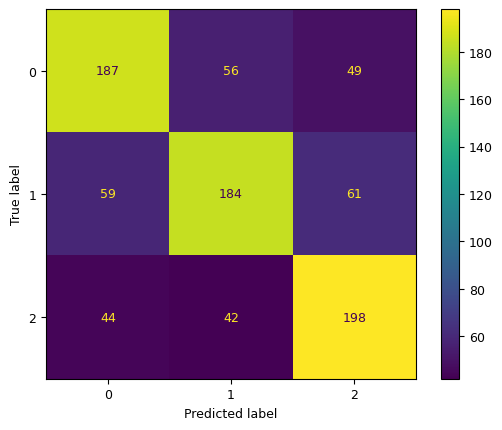

In [306]:
# Second grid
y_train_pred = cross_val_predict(grid_2, Xtrain, ytrain, cv = 3, n_jobs = -1)
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(ytrain, y_train_pred)
plt.show()

In [307]:
# Second grid
cross_val_score(grid_2, Xtrain, ytrain, cv = 3, scoring = 'accuracy', n_jobs = -1)

array([0.63265306, 0.67235495, 0.63481229])

#### Test Performace Ovo

In [308]:
# First grid
y_test_pred = grid_1.predict(Xtest)
print('The accuracy score is:', metrics.accuracy_score(ytest, y_test_pred))
print('The precision score is:', metrics.precision_score(ytest, y_test_pred, average = 'macro'))
print('The recall score is: ',metrics.recall_score(ytest, y_test_pred, average = 'macro'))
print('The f1 score is: ',metrics.f1_score(ytest, y_test_pred, average = 'macro'))

The accuracy score is: 0.6863636363636364
The precision score is: 0.6884043277754381
The recall score is:  0.6844685242518059
The f1 score is:  0.6833644195754508


In [309]:
# Second grid
y_test_pred = grid_2.predict(Xtest)
print('The accuracy score is:', metrics.accuracy_score(ytest, y_test_pred))
print('The precision score is:', metrics.precision_score(ytest, y_test_pred, average = 'macro'))
print('The recall score is: ',metrics.recall_score(ytest, y_test_pred, average = 'macro'))
print('The f1 score is: ',metrics.f1_score(ytest, y_test_pred, average = 'macro'))

The accuracy score is: 0.6772727272727272
The precision score is: 0.6758264671147867
The recall score is:  0.6751805985552116
The f1 score is:  0.6741602203764119


## Logistic Regression on MinMax Data

In [310]:
Xtrain, Xtest, ytrain, ytest  = train_test_split(data_min_max_features,data_min_max_labels, test_size=0.2, random_state=42)

In [311]:
grid_1 = GridSearchCV(OneVsOneClassifier(LogisticRegression(random_state = 42)), param_grid_ovo_1, cv = 5, scoring = 'accuracy', n_jobs = -1)
grid_1.fit(Xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=OneVsOneClassifier(estimator=LogisticRegression(random_state=42)),
             n_jobs=-1,
             param_grid=[{'estimator__C': [0.0001, 0.000774263682681127,
                                           0.005994842503189409,
                                           0.046415888336127774,
                                           0.3593813663804626,
                                           2.782559402207126, 21.54434690031882,
                                           166.81005372000558,
                                           1291.5496650148827, 10000.0, 1],
                          'estimator__fit_intercept': [True, False],
                          'estimator__max_iter': [200, 800, 1500, 4000],
                          'estimator__penalty': ['l2', None],
                          'estimator__solver': ['lbfgs', 'newton-cg', 'sag',
                                                'saga']}],
             scoring='accuracy')

In [312]:
grid_2 = GridSearchCV(OneVsOneClassifier(LogisticRegression(random_state = 42)), param_grid_ovo_2, cv = 5, scoring = 'accuracy', n_jobs = -1)
grid_2.fit(Xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=OneVsOneClassifier(estimator=LogisticRegression(random_state=42)),
             n_jobs=-1,
             param_grid=[{'estimator__C': array([1.00010000e+00, 1.00077426e+00, 1.00599484e+00, 1.04641589e+00,
       1.35938137e+00, 3.78255940e+00, 2.25443469e+01, 1.67810054e+02,
       1.29254967e+03, 1.00010000e+04]),
                          'estimator__fit_intercept': [True, False],
                          'estimator__max_iter': [200, 800, 1500, 4000],
                          'estimator__penalty': ['l2', 'l1'],
                          'estimator__solver': ['liblinear']}],
             scoring='accuracy')

#### Confusion Matrix Ovo

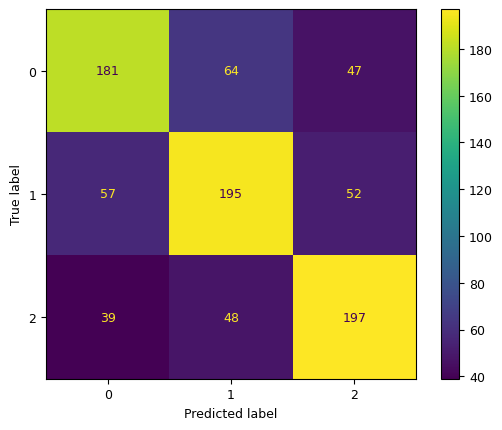

In [313]:
# First Grid
y_train_pred = cross_val_predict(grid_1, Xtrain, ytrain, cv = 3, n_jobs = -1)
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(ytrain, y_train_pred)
plt.show()

In [314]:
# First Grid
cross_val_score(grid_1, Xtrain, ytrain, cv = 3, scoring = 'accuracy', n_jobs = -1)

array([0.62585034, 0.68259386, 0.64505119])

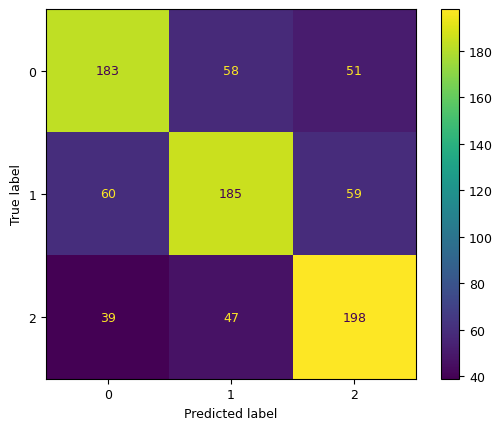

In [315]:
# Second Grid
y_train_pred = cross_val_predict(grid_2, Xtrain, ytrain, cv = 3, n_jobs = -1)
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(ytrain, y_train_pred)
plt.show()

In [316]:
# Second Grid
cross_val_score(grid_2, Xtrain, ytrain, cv = 3, scoring = 'accuracy', n_jobs = -1)

array([0.61564626, 0.67918089, 0.63481229])

#### Test performance Ovo

In [317]:
y_test_pred = grid_1.predict(Xtest)
print('The accuracy score is:', metrics.accuracy_score(ytest, y_test_pred))
print('The precision score is:', metrics.precision_score(ytest, y_test_pred, average = 'macro'))
print('The recall score is: ',metrics.recall_score(ytest, y_test_pred, average = 'macro'))
print('The f1 score is: ',metrics.f1_score(ytest, y_test_pred, average = 'macro'))

The accuracy score is: 0.6863636363636364
The precision score is: 0.6869670090258326
The recall score is:  0.6844685242518059
The f1 score is:  0.6827695607489163


In [318]:
y_test_pred = grid_2.predict(Xtest)
print('The accuracy score is:', metrics.accuracy_score(ytest, y_test_pred))
print('The precision score is:', metrics.precision_score(ytest, y_test_pred, average = 'macro'))
print('The recall score is: ',metrics.recall_score(ytest, y_test_pred, average = 'macro'))
print('The f1 score is: ',metrics.f1_score(ytest, y_test_pred, average = 'macro'))

The accuracy score is: 0.6863636363636364
The precision score is: 0.6869670090258326
The recall score is:  0.6844685242518059
The f1 score is:  0.6827695607489163


## Logistic Regression on PCA Data

In [319]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data_10_features, data_10_labels, test_size=0.2, random_state=42)

#### Tune of Ovo classifier

In [320]:
grid_1 = GridSearchCV(OneVsOneClassifier(LogisticRegression(random_state = 42)), param_grid_ovo_1, cv = 5, scoring = 'accuracy', n_jobs = -1)
grid_1.fit(Xtrain, ytrain)

C:\Users\len\anaconda3\envs\Machine_Learning\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\len\anaconda3\envs\Machine_Learning\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\len\anaconda3\envs\Machine_Learning\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


GridSearchCV(cv=5,
             estimator=OneVsOneClassifier(estimator=LogisticRegression(random_state=42)),
             n_jobs=-1,
             param_grid=[{'estimator__C': [0.0001, 0.000774263682681127,
                                           0.005994842503189409,
                                           0.046415888336127774,
                                           0.3593813663804626,
                                           2.782559402207126, 21.54434690031882,
                                           166.81005372000558,
                                           1291.5496650148827, 10000.0, 1],
                          'estimator__fit_intercept': [True, False],
                          'estimator__max_iter': [200, 800, 1500, 4000],
                          'estimator__penalty': ['l2', None],
                          'estimator__solver': ['lbfgs', 'newton-cg', 'sag',
                                                'saga']}],
             scoring='accuracy')

In [321]:
grid_2 = GridSearchCV(OneVsOneClassifier(LogisticRegression(random_state = 42)), param_grid_ovo_2, cv = 5, scoring = 'accuracy', n_jobs = -1)
grid_2.fit(Xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=OneVsOneClassifier(estimator=LogisticRegression(random_state=42)),
             n_jobs=-1,
             param_grid=[{'estimator__C': array([1.00010000e+00, 1.00077426e+00, 1.00599484e+00, 1.04641589e+00,
       1.35938137e+00, 3.78255940e+00, 2.25443469e+01, 1.67810054e+02,
       1.29254967e+03, 1.00010000e+04]),
                          'estimator__fit_intercept': [True, False],
                          'estimator__max_iter': [200, 800, 1500, 4000],
                          'estimator__penalty': ['l2', 'l1'],
                          'estimator__solver': ['liblinear']}],
             scoring='accuracy')

#### Confusion Matrix Ovo

C:\Users\len\anaconda3\envs\Machine_Learning\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\len\anaconda3\envs\Machine_Learning\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\len\anaconda3\envs\Machine_Learning\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


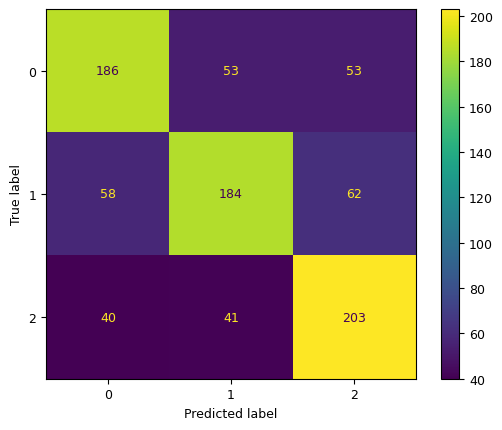

In [322]:
# First Grid
y_train_pred = cross_val_predict(grid_1, Xtrain, ytrain, cv = 3)
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(ytrain, y_train_pred)
plt.show()

In [323]:
# First Grid
cross_val_score(grid_1, Xtrain, ytrain, cv = 3, scoring = 'accuracy', n_jobs = -1)

array([0.63605442, 0.65870307, 0.65870307])

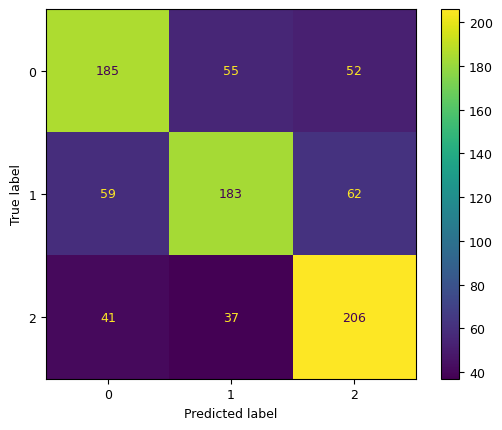

In [290]:
# Second Grid
y_train_pred = cross_val_predict(grid_2, Xtrain, ytrain, cv = 3)
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(ytrain, y_train_pred)
plt.show()

In [324]:
# Second Grid
cross_val_score(grid_2, Xtrain, ytrain, cv = 3, scoring = 'accuracy', n_jobs = -1)

array([0.63605442, 0.66211604, 0.65870307])

#### Test Ovo

In [325]:
y_test_pred = grid_1.predict(Xtest)
print('The accuracy score is:', metrics.accuracy_score(ytest, y_test_pred))
print('The precision score is:', metrics.precision_score(ytest, y_test_pred, average = 'macro'))
print('The recall score is: ',metrics.recall_score(ytest, y_test_pred, average = 'macro'))
print('The f1 score is: ',metrics.f1_score(ytest, y_test_pred, average = 'macro'))

The accuracy score is: 0.6636363636363637
The precision score is: 0.6601584136479449
The recall score is:  0.6584107327141383
The f1 score is:  0.655154822856216


In [326]:
y_test_pred = grid_2.predict(Xtest)
print('The accuracy score is:', metrics.accuracy_score(ytest, y_test_pred))
print('The precision score is:', metrics.precision_score(ytest, y_test_pred, average = 'macro'))
print('The recall score is: ',metrics.recall_score(ytest, y_test_pred, average = 'macro'))
print('The f1 score is: ',metrics.f1_score(ytest, y_test_pred, average = 'macro'))

The accuracy score is: 0.6636363636363637
The precision score is: 0.6601584136479449
The recall score is:  0.6584107327141383
The f1 score is:  0.655154822856216


## Logistic on Scaled PCA data

In [327]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data_min_max_15_features, data_min_max_15_labels, test_size=0.2, random_state=42)

#### Tune Ovo

In [329]:
grid_1 = GridSearchCV(OneVsOneClassifier(LogisticRegression(random_state = 42)), param_grid_ovo_1, cv = 5, scoring = 'accuracy', n_jobs = -1)
grid_1.fit(Xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=OneVsOneClassifier(estimator=LogisticRegression(random_state=42)),
             n_jobs=-1,
             param_grid=[{'estimator__C': [0.0001, 0.000774263682681127,
                                           0.005994842503189409,
                                           0.046415888336127774,
                                           0.3593813663804626,
                                           2.782559402207126, 21.54434690031882,
                                           166.81005372000558,
                                           1291.5496650148827, 10000.0, 1],
                          'estimator__fit_intercept': [True, False],
                          'estimator__max_iter': [200, 800, 1500, 4000],
                          'estimator__penalty': ['l2', None],
                          'estimator__solver': ['lbfgs', 'newton-cg', 'sag',
                                                'saga']}],
             scoring='accuracy')

In [330]:
grid_2 = GridSearchCV(OneVsOneClassifier(LogisticRegression()), param_grid_ovo_2, cv = 5, scoring = 'accuracy', n_jobs = -1)
grid_2.fit(Xtrain, ytrain)

GridSearchCV(cv=5, estimator=OneVsOneClassifier(estimator=LogisticRegression()),
             n_jobs=-1,
             param_grid=[{'estimator__C': array([1.00010000e+00, 1.00077426e+00, 1.00599484e+00, 1.04641589e+00,
       1.35938137e+00, 3.78255940e+00, 2.25443469e+01, 1.67810054e+02,
       1.29254967e+03, 1.00010000e+04]),
                          'estimator__fit_intercept': [True, False],
                          'estimator__max_iter': [200, 800, 1500, 4000],
                          'estimator__penalty': ['l2', 'l1'],
                          'estimator__solver': ['liblinear']}],
             scoring='accuracy')

#### Confusion Matrix Ovo

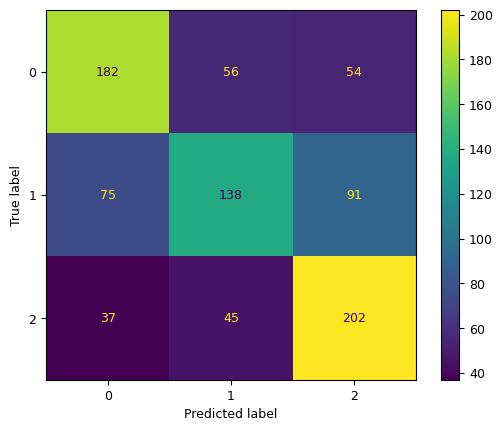

In [331]:
# First Grid
y_train_pred = cross_val_predict(grid_1, Xtrain, ytrain, cv = 3, n_jobs = -1)
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(ytrain, y_train_pred)
plt.show()

In [332]:
# First Grid
cross_val_score(grid_1, Xtrain, ytrain, cv = 3, scoring = 'accuracy', n_jobs = -1)

array([0.58163265, 0.62798635, 0.56996587])

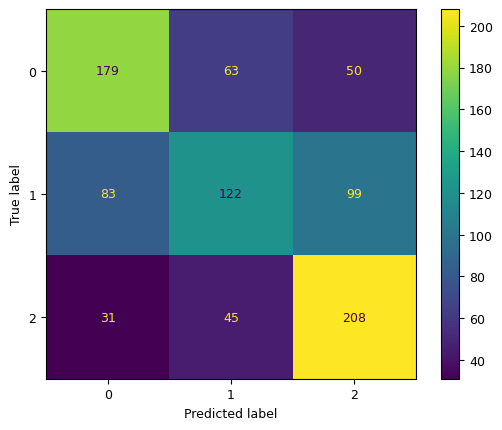

In [333]:
# Second Grid
y_train_pred = cross_val_predict(grid_2, Xtrain, ytrain, cv = 3, n_jobs = -1)
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(ytrain, y_train_pred)
plt.show()

In [334]:
# Second Grid
cross_val_score(grid_2, Xtrain, ytrain, cv = 3, scoring = 'accuracy', n_jobs = -1)

array([0.55442177, 0.60409556, 0.57679181])

#### Test ovo

In [335]:
y_test_pred = grid_1.predict(Xtest)
print('The accuracy score is:', metrics.accuracy_score(ytest, y_test_pred))
print('The precision score is:', metrics.precision_score(ytest, y_test_pred, average = 'macro'))
print('The recall score is: ',metrics.recall_score(ytest, y_test_pred, average = 'macro'))
print('The f1 score is: ',metrics.f1_score(ytest, y_test_pred, average = 'macro'))

The accuracy score is: 0.5636363636363636
The precision score is: 0.5569137756790355
The recall score is:  0.5583075335397317
The f1 score is:  0.5527166994342877


In [336]:
y_test_pred = grid_2.predict(Xtest)
print('The accuracy score is:', metrics.accuracy_score(ytest, y_test_pred))
print('The precision score is:', metrics.precision_score(ytest, y_test_pred, average = 'macro'))
print('The recall score is: ',metrics.recall_score(ytest, y_test_pred, average = 'macro'))
print('The f1 score is: ',metrics.f1_score(ytest, y_test_pred, average = 'macro'))

The accuracy score is: 0.6
The precision score is: 0.5917514861715969
The recall score is:  0.5902992776057792
The f1 score is:  0.5757257257257257


## Conclusion and Final predicitions

We can conclude that our assumptions on the correctness of the PCA were right since having it tested on the model we notice that it performs worse than other models. 
We have two models that performs quite the same which are grid_1 on Original data and grid_1 on MinMax Data, since the first one is slighy better on other paramteres as precision, recall and f1 we will choose that one as our best model so MinMax was a not so useful transformation differently from our initial thoughts

So the procedure we have used is to remove the linearly indipendent data, create a grid for GridSearchCV and then tune the model.

### Best Model

In [337]:
Xtrain, Xtest, ytrain, ytest  = train_test_split(data_features,data_labels, test_size=0.2, random_state=42)
param_grid_ovo_1 = [{'estimator__penalty': ['l2', None], 'estimator__C':list(np.logspace(-4, 4, 10)) + [1] , 'estimator__solver' : ['lbfgs', 'newton-cg', 'sag', 'saga'], 
                       'estimator__max_iter': [200,800,1500,4000], 'estimator__fit_intercept' : [True, False] }]
grid_1 = GridSearchCV(OneVsOneClassifier(LogisticRegression(random_state = 42)), param_grid_ovo_1, cv = 5, scoring = 'accuracy', n_jobs = -1)
grid_1.fit(Xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=OneVsOneClassifier(estimator=LogisticRegression(random_state=42)),
             n_jobs=-1,
             param_grid=[{'estimator__C': [0.0001, 0.000774263682681127,
                                           0.005994842503189409,
                                           0.046415888336127774,
                                           0.3593813663804626,
                                           2.782559402207126, 21.54434690031882,
                                           166.81005372000558,
                                           1291.5496650148827, 10000.0, 1],
                          'estimator__fit_intercept': [True, False],
                          'estimator__max_iter': [200, 800, 1500, 4000],
                          'estimator__penalty': ['l2', None],
                          'estimator__solver': ['lbfgs', 'newton-cg', 'sag',
                                                'saga']}],
             scoring='accuracy')

In [338]:
grid_1.best_params_

{'estimator__C': 0.005994842503189409,
 'estimator__fit_intercept': True,
 'estimator__max_iter': 200,
 'estimator__penalty': 'l2',
 'estimator__solver': 'lbfgs'}

### Predictions on new dataset

In [339]:
data_test =pd.read_csv("C:\\Users\\len\\OneDrive\\Desktop\\BAI\\Machine Learning\\mldata_0003173616.TEST_FEATURES.csv")
data_test

id  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0        0   0.065132  -0.551744  -0.304496  -4.197353  -0.240425  -3.684970   
1        1   0.938406  -0.861167   0.439438  -2.284386   0.538079  -0.736891   
2        2   0.426162   0.593630  -0.612997   1.352579  -1.340067   0.330433   
3        3   0.343348  -0.874629   1.424454   0.893148  -0.037470   5.979174   
4        4  -0.067757   0.478371  -3.090441  -3.173447   1.911852   0.258114   
...    ...        ...        ...        ...        ...        ...        ...   
1095  1095  -0.076371  -0.246769  -1.350172   3.196197  -0.832478   1.194229   
1096  1096  -0.160887  -1.019695   3.002152   2.814660  -1.200521   0.387644   
1097  1097  -1.110514   0.876537  -1.913640   1.841577   1.805134  -0.066433   
1098  1098  -0.697457   0.812401  -2.386399   3.239477   0.105167  -0.960491   
1099  1099  -1.767093  -0.296187   1.040373  -2.209668  -0.568062  -3.653685   

      feature_7  feature_8  feature_9  ...  feature_16  feature_17  \
0      5.344062   0.066259   0.498392  ...   -1.077697   -1.185916   
1      2.380419  -1.066815  -0.187203  ...   -1.207178    0.807477   
2      0.584782   2.118824  -0.929977  ...    0.443262    1.179775   
3     -4.143243  -0.975792  -0.233034  ...    0.832508   -1.615391   
4      1.448852  -1.894397   1.158748  ...   -0.325260    0.625663   
...         ...        ...        ...  ...         ...         ...   
1095   0.755132  -1.578824  -2.224157  ...   -0.121298    2.064984   
1096   0.386907  -1.434017   0.118364  ...   -0.577657   -0.229573   
1097  -1.327046   1.825270   0.078717  ...   -1.452792   -1.359136   
1098   2.897060   3.097279   0.603224  ...    1.001343    1.520750   
1099   2.471581   3.430203  -0.957542  ...   -1.431666    0.518716   

      feature_18  feature_19  feature_20  feature_21  feature_22  feature_23  \
0       0.825127    1.332030   -1.162705    2.498382   -1.162705   -0.244261   
1      -0.148156    0.986133    0.637346    2.167897    0.637346   -3.177362   
2       0.772446   -0.416185    0.880975   -2.223998    0.880975   -1.235058   
3      -1.135342    0.615432    3.587700    1.222722    3.587700   -2.793069   
4      -1.168280   -0.140877    0.728276    1.121677    0.728276    2.001503   
...          ...         ...         ...         ...         ...         ...   
1095    0.703910   -0.243117   -0.760515    0.707927   -0.760515   -0.322532   
1096    0.767858    0.112388   -1.940110    1.819595   -1.940110   -0.134339   
1097   -1.039864   -0.609820   -0.006592    1.997451   -0.006592    3.212419   
1098    0.415366    0.618988   -3.127420    0.260070   -3.127420    1.411199   
1099   -1.220822    1.403295   -0.481457    1.530153   -0.481457    0.901506   

      feature_24  feature_25  
0      -4.913267   -2.339822  
1      -0.075310    1.474569  
2       3.996733    2.547395  
3      -2.961730    1.147832  
4      -3.170200   -2.054939  
...          ...         ...  
1095   -1.779262    0.073453  
1096   -2.108130   -0.359540  
1097    0.323329   -0.967222  
1098   -4.130394    0.333279  
1099    0.071047   -1.507937  

[1100 rows x 26 columns]

In [340]:
data_test.drop('id', inplace = True, axis = 'columns') 
counter = 0
for i in data_test.columns:
    counter += 1
    data_test.rename({i: f'{counter}'},inplace = True, axis = 'columns')

In [341]:
data_test

1         2         3         4         5         6         7  \
0     0.065132 -0.551744 -0.304496 -4.197353 -0.240425 -3.684970  5.344062   
1     0.938406 -0.861167  0.439438 -2.284386  0.538079 -0.736891  2.380419   
2     0.426162  0.593630 -0.612997  1.352579 -1.340067  0.330433  0.584782   
3     0.343348 -0.874629  1.424454  0.893148 -0.037470  5.979174 -4.143243   
4    -0.067757  0.478371 -3.090441 -3.173447  1.911852  0.258114  1.448852   
...        ...       ...       ...       ...       ...       ...       ...   
1095 -0.076371 -0.246769 -1.350172  3.196197 -0.832478  1.194229  0.755132   
1096 -0.160887 -1.019695  3.002152  2.814660 -1.200521  0.387644  0.386907   
1097 -1.110514  0.876537 -1.913640  1.841577  1.805134 -0.066433 -1.327046   
1098 -0.697457  0.812401 -2.386399  3.239477  0.105167 -0.960491  2.897060   
1099 -1.767093 -0.296187  1.040373 -2.209668 -0.568062 -3.653685  2.471581   

             8         9        10  ...        16        17        18  \
0     0.066259  0.498392  0.669801  ... -1.077697 -1.185916  0.825127   
1    -1.066815 -0.187203  0.417359  ... -1.207178  0.807477 -0.148156   
2     2.118824 -0.929977  0.303648  ...  0.443262  1.179775  0.772446   
3    -0.975792 -0.233034  0.118809  ...  0.832508 -1.615391 -1.135342   
4    -1.894397  1.158748  0.984189  ... -0.325260  0.625663 -1.168280   
...        ...       ...       ...  ...       ...       ...       ...   
1095 -1.578824 -2.224157 -0.895201  ... -0.121298  2.064984  0.703910   
1096 -1.434017  0.118364  0.481203  ... -0.577657 -0.229573  0.767858   
1097  1.825270  0.078717  0.365759  ... -1.452792 -1.359136 -1.039864   
1098  3.097279  0.603224  1.713462  ...  1.001343  1.520750  0.415366   
1099  3.430203 -0.957542  1.120336  ... -1.431666  0.518716 -1.220822   

            19        20        21        22        23        24        25  
0     1.332030 -1.162705  2.498382 -1.162705 -0.244261 -4.913267 -2.339822  
1     0.986133  0.637346  2.167897  0.637346 -3.177362 -0.075310  1.474569  
2    -0.416185  0.880975 -2.223998  0.880975 -1.235058  3.996733  2.547395  
3     0.615432  3.587700  1.222722  3.587700 -2.793069 -2.961730  1.147832  
4    -0.140877  0.728276  1.121677  0.728276  2.001503 -3.170200 -2.054939  
...        ...       ...       ...       ...       ...       ...       ...  
1095 -0.243117 -0.760515  0.707927 -0.760515 -0.322532 -1.779262  0.073453  
1096  0.112388 -1.940110  1.819595 -1.940110 -0.134339 -2.108130 -0.359540  
1097 -0.609820 -0.006592  1.997451 -0.006592  3.212419  0.323329 -0.967222  
1098  0.618988 -3.127420  0.260070 -3.127420  1.411199 -4.130394  0.333279  
1099  1.403295 -0.481457  1.530153 -0.481457  0.901506  0.071047 -1.507937  

[1100 rows x 25 columns]

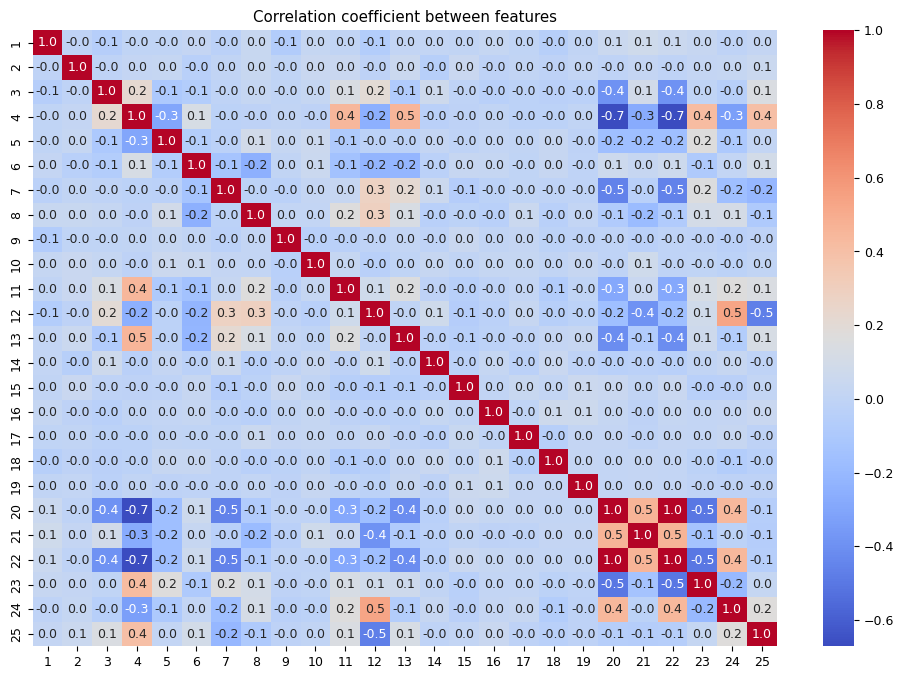

In [342]:
plt.figure(figsize = (12,8))
plt.title('Correlation coefficient between features')
sns.heatmap(data_test.corr(), annot = True, cmap = 'coolwarm', fmt ='.01f');

In [343]:
data_test.drop('20',inplace = True, axis = 'columns')

In [345]:
predictions = grid_1.predict(data_test)

In [349]:
predictions

array([2, 0, 0, ..., 1, 2, 1], dtype=int64)

In [350]:
np.unique(predictions, return_counts = True)

(array([0, 1, 2], dtype=int64), array([368, 348, 384], dtype=int64))

In [352]:
np.savetxt('test_predictions_Giacomello.txt', predictions, delimiter = ',', fmt = '%.0f')